Node: A, Alpha: -inf, Beta: inf
Enter utility value for node D: 1
Node: B, Alpha: -inf, Beta: 1
Enter utility value for node E: 3
Node: B, Alpha: -inf, Beta: 1
Node: A, Alpha: 1, Beta: inf
Enter utility value for node F: 2
Node: C, Alpha: 1, Beta: 2
Enter utility value for node G: 4
Node: C, Alpha: 1, Beta: 2
Node: A, Alpha: 2, Beta: inf
Alpha-Beta search result: 2


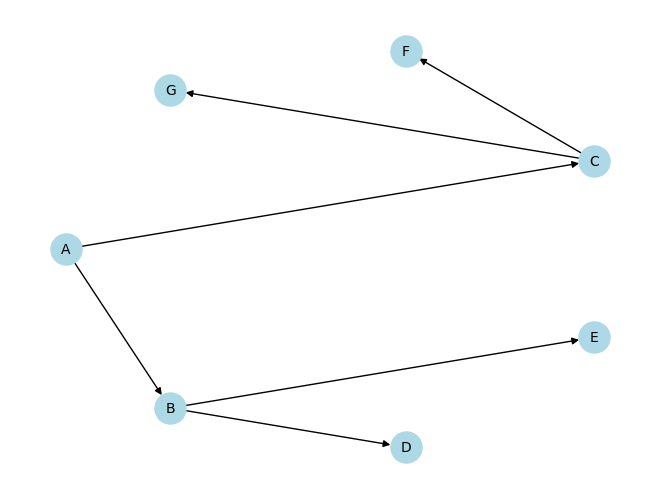

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the tree structure as a dictionary where each node has a name and a list of children nodes
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}

def alpha_beta_search(node, alpha, beta, G):
    if not tree[node]:
        # Leaf node, return its value
        return int(input(f"Enter utility value for node {node}: "))

    if node == 'A':
        print(f"Node: {node}, Alpha: {alpha}, Beta: {beta}")
    
    if node == 'A':
        value = max_value(node, alpha, beta, G)
    else:
        value = min_value(node, alpha, beta, G)

    return value
def max_value(node, alpha, beta, G):
    v = float('-inf')
    
    for child in tree[node]:
        G.add_edge(node, child)
        v = max(v, alpha_beta_search(child, alpha, beta, G))
        alpha = max(alpha, v)
        
        if v >= beta:
            print(f"Node: {node}, Alpha: {alpha}, Beta: {beta}, Pruned")
            return v
        
        print(f"Node: {node}, Alpha: {alpha}, Beta: {beta}")

    return v

def min_value(node, alpha, beta, G):
    v = float('inf')
    
    for child in tree[node]:
        G.add_edge(node, child)
        v = min(v, alpha_beta_search(child, alpha, beta, G))
        beta = min(beta, v)
        
        if v <= alpha:
            print(f"Node: {node}, Alpha: {alpha}, Beta: {beta}, Pruned")
            return v
        
        print(f"Node: {node}, Alpha: {alpha}, Beta: {beta}")

    return v

# Create a directed graph to visualize the tree
G = nx.DiGraph()
root_node = 'A'
alpha = float('-inf')
beta = float('inf')

result = alpha_beta_search(root_node, alpha, beta, G)
print(f"Alpha-Beta search result: {result}")

# Visualize the tree using `shell_layout`
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', arrowsize=10)
plt.show()

In [7]:
import numpy as np
MIN=float("-inf")
MAX=float("inf")
count = 0
def alpha_beta(depth, index, maximizingPlayer,values, alpha, beta):
    global count
    if depth == 0:
        return values[index]


    if maximizingPlayer:
        opti = MIN
        for i in range(0, 2):
            val = alpha_beta(depth - 1, index * 2 + i,False, values, alpha, beta)
            opti = max(opti, val)
            alpha = max(alpha, opti)
            if beta <= alpha:
                count = count+1
                break
        return opti

    else:
        opti = MAX
        for i in range(0, 2):
            val = alpha_beta(depth - 1, index * 2 + i,True, values, alpha, beta)
            opti = min(opti, val)
            beta = min(beta, opti)
            if beta <= alpha:
                count = count+1
                break
        return opti

# Driver Code
if __name__ == "__main__":


    values = [10,5,7,11,12,8,9,8,5,12,11,12,9,8,7,10]
    dep=int(np.log2(len(values)))
    print("The value is :", alpha_beta(dep, 0, True, values, MIN, MAX))
    print("Number of times pruned : ",count)

The value is : 8
Number of times pruned :  3
